In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trade-dataset/trade_1988_2021.csv


In [4]:
data_path = '/kaggle/input/trade-dataset/trade_1988_2021.csv'

dataset = pd.read_csv(data_path)

In [5]:
dataset.sample(5)

,ReporterISO3,ReporterName,PartnerISO3,PartnerName,Year,TradeFlowName,TradeValue in 1000 USD
547522,SWE,Sweden,CRI,Costa Rica,1992,Export,7475.274
311041,KOR,"Korea, Rep.",MUS,Mauritius,2010,Export,39853.329
395522,NLD,Netherlands,MAR,Morocco,2012,Export,1185812.333
603478,GBR,United Kingdom,PLW,Palau,2000,Export,118.597
305890,KEN,Kenya,TUR,Turkey,1997,Export,1915.702


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634509 entries, 0 to 634508
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ReporterISO3            634509 non-null  object 
 1   ReporterName            634509 non-null  object 
 2   PartnerISO3             634509 non-null  object 
 3   PartnerName             634509 non-null  object 
 4   Year                    634509 non-null  int64  
 5   TradeFlowName           634509 non-null  object 
 6   TradeValue in 1000 USD  634441 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 33.9+ MB


In [7]:
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
filtered_data = dataset[(dataset['ReporterName'].isin(brics_countries)) | (dataset['PartnerName'].isin(brics_countries))]


In [68]:
import networkx as nx
import pandas as pd


G = nx.from_pandas_edgelist(
    filtered_data,
    source='ReporterName',
    target='PartnerName',
    edge_attr='TradeValue in 1000 USD',
    create_using=nx.DiGraph())

degree_centrality = nx.degree_centrality(G)  
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

closeness_centrality = nx.closeness_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

centrality_measures = pd.DataFrame({
    'Degree Centrality': pd.Series(degree_centrality),
    'In-degree Centrality': pd.Series(in_degree_centrality),
    'Out-degree Centrality': pd.Series(out_degree_centrality),
    'Closeness Centrality': pd.Series(closeness_centrality),
    'Betweenness Centrality': pd.Series(betweenness_centrality)
})

print(centrality_measures)


                                Degree Centrality  In-degree Centrality  \
Afghanistan                              0.039062              0.019531   
India                                    1.746094              0.785156   
Russian Federation                       1.632812              0.726562   
China                                    1.667969              0.785156   
Brazil                                   1.722656              0.746094   
...                                           ...                   ...   
European Union                           0.019531              0.000000   
Neutral Zone                             0.007812              0.007812   
Special Categories                       0.007812              0.007812   
South Georgia and the South Sa           0.003906              0.003906   
Br. Antr. Terr                           0.003906              0.003906   

                                Out-degree Centrality  Closeness Centrality  \
Afghanistan         

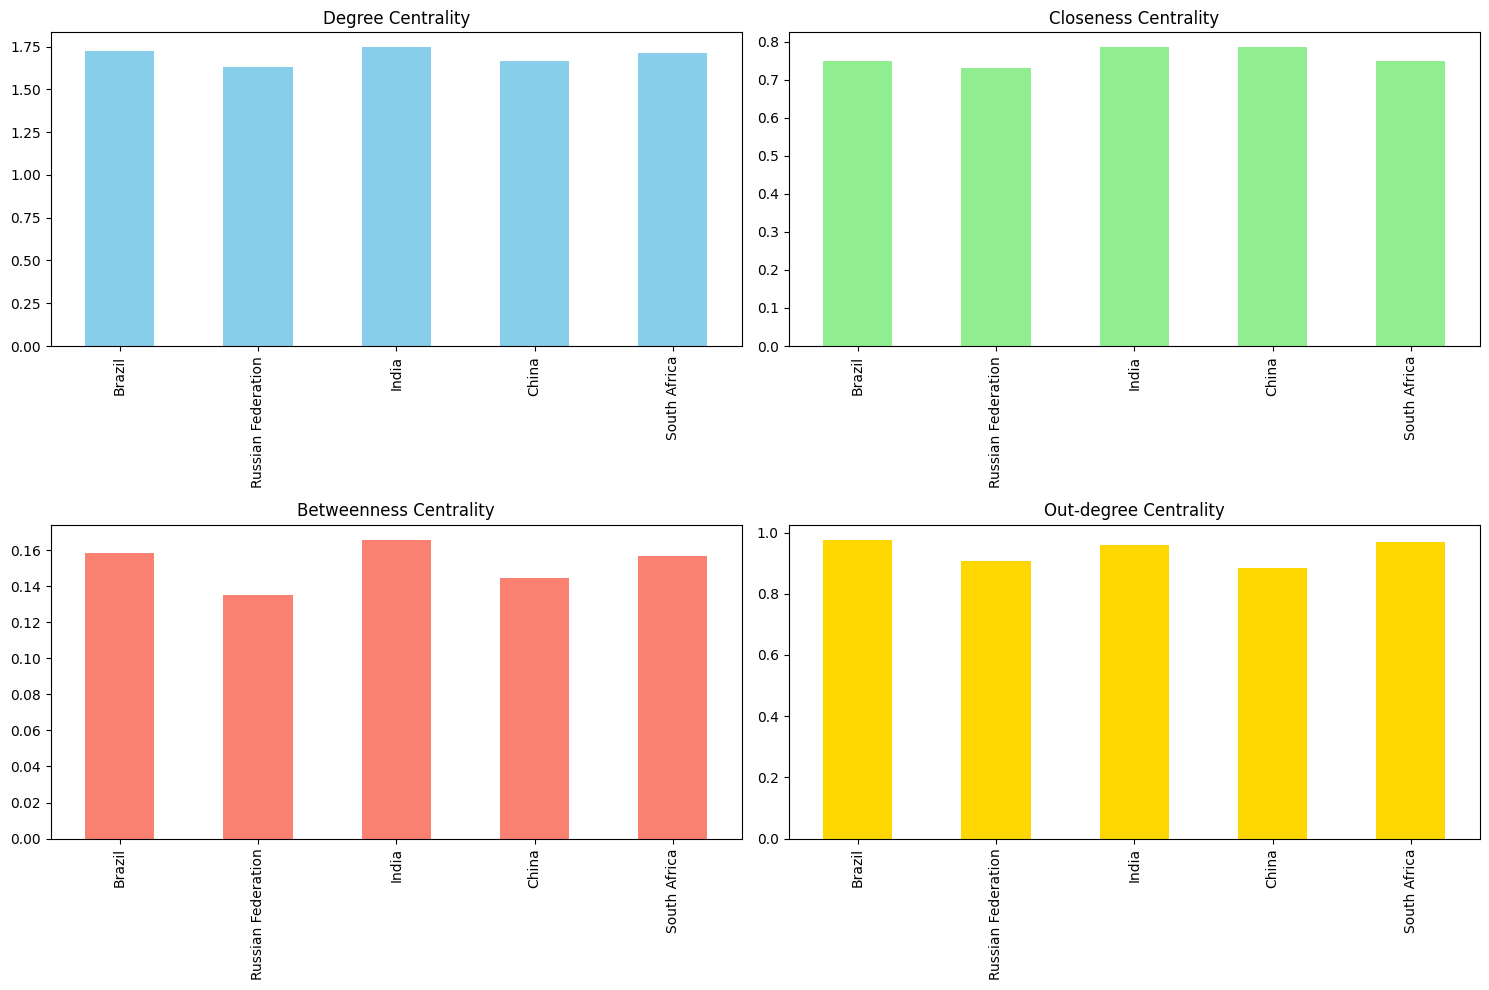

In [69]:
import matplotlib.pyplot as plt

brics_data = centrality_measures.loc[['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
brics_data['Degree Centrality'].plot(kind='bar', ax=ax[0, 0], color='skyblue', title='Degree Centrality')
brics_data['Closeness Centrality'].plot(kind='bar', ax=ax[0, 1], color='lightgreen', title='Closeness Centrality')
brics_data['Betweenness Centrality'].plot(kind='bar', ax=ax[1, 0], color='salmon', title='Betweenness Centrality')
brics_data['Out-degree Centrality'].plot(kind='bar', ax=ax[1, 1], color='gold', title='Out-degree Centrality')

plt.tight_layout()
plt.show()


In [70]:
import networkx as nx
import pandas as pd

G = nx.DiGraph()

# Add nodes
for country in brics_countries:
    G.add_node(country, attr_dict=dataset[dataset['ReporterName'] == country].iloc[0].to_dict())

# Add edges
for _, row in filtered_data.iterrows():
    # Check if both Reporter and Partner are in BRICS countries list to avoid external links if necessary
    if row['ReporterName'] in brics_countries and row['PartnerName'] in brics_countries:
        # Edge from Reporter to Partner with trade value as an attribute
        G.add_edge(row['ReporterName'], row['PartnerName'], trade_value=row['TradeValue in 1000 USD'])

# Check the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")



Number of nodes: 5
Number of edges: 20


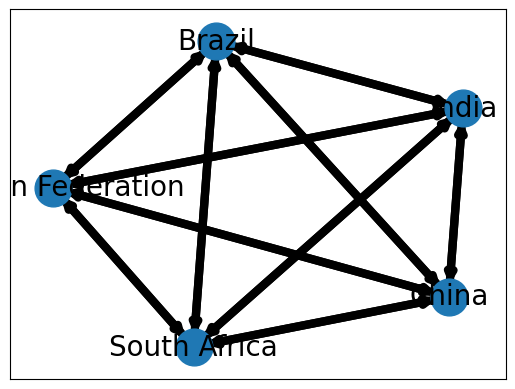

In [71]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=6)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.show()



In [72]:
!pip install torch torchvision


In [73]:
import torch
print(torch.__version__)



2.1.2+cpu


In [74]:

!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-1.12.1+cpu.html
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cpu.html
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cpu.html


In [75]:
import torch_geometric
print("PyTorch Geometric version:", torch_geometric.__version__)

PyTorch Geometric version: 2.5.3


In [76]:
import torch
from torch_geometric.utils import from_networkx

# Convert NetworkX graph to PyTorch Geometric graph
data = from_networkx(G)

# If you have node features in the graph
# Assuming each node in NetworkX has an attribute dictionary where 'feature' is one of the keys
# You need to ensure that all nodes have this 'feature' attribute and it's numeric
for node in G.nodes(data=True):
    node[1]['feature'] = torch.tensor([float(node[1].get('some_numeric_feature', 0))])  # Replace 'some_numeric_feature' with actual attribute key

# Edge attributes (if your NetworkX graph edges have attributes like trade_value)
# Ensure that all edges have this attribute and it's numeric
for u, v, attr in G.edges(data=True):
    attr['weight'] = torch.tensor([float(attr.get('trade_value', 0))])

# Update the PyTorch Geometric data object with these attributes
data.x = torch.stack([node[1]['feature'] for node in G.nodes(data=True)])
data.edge_attr = torch.stack([attr['weight'] for _, _, attr in G.edges(data=True)])

print(data)


Data(edge_index=[2, 20], attr_dict=[5], trade_value=[20], num_nodes=5, x=[5, 1], edge_attr=[20, 1])


In [117]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx, subgraph

num_nodes = G.number_of_nodes()  # Number of nodes in your graph
node_features = torch.rand((num_nodes, 5))  # Random features, adjust dimension as needed

# Convert to PyTorch Geometric data object and assign features
data = from_networkx(G)
data.x = node_features  # Assign random features or other meaningful features

# Labels should also be set; here's a placeholder assignment
data.y = torch.randint(0, 3, (num_nodes,))  # Example: 3 classes

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx, subgraph
from sklearn.model_selection import train_test_split


num_nodes = G.number_of_nodes()
node_features = torch.rand((num_nodes, 5))  # Random features as an example
data = from_networkx(G)
data.x = node_features
data.y = torch.randint(0, 3, (num_nodes,))  # Example labels for 3 classes

# Check class distribution
unique, counts = torch.unique(data.y, return_counts=True)
class_distribution = dict(zip(unique.tolist(), counts.tolist()))
print("Class distribution:", class_distribution)

In [ ]:
# If any class has fewer than 2 samples, consider combining or removing them
min_class_samples = 2
for cls, count in class_distribution.items():
    if count < min_class_samples:
        print(f"Class {cls} has only {count} samples and needs to be adjusted.")


In [ ]:
# Stratified Split (fallback to regular split if needed)
try:
    from sklearn.model_selection import StratifiedShuffleSplit
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    train_idx, test_idx = next(splitter.split(data.x, data.y))
except ValueError as e:
    print(f"Stratified split error: {e}")
    print("Falling back to regular train-test split.")
    train_idx, test_idx = train_test_split(range(num_nodes), test_size=0.2, random_state=42)

In [ ]:
import pandas as pd

# Sample data aggregation
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
filtered_data = dataset[(dataset['ReporterName'].isin(brics_countries)) & (dataset['PartnerName'].isin(brics_countries))]

# Aggregate trade values per year for each country pair
agg_data = filtered_data.groupby(['Year', 'ReporterName', 'PartnerName'])['TradeValue in 1000 USD'].sum().reset_index()

# Pivot the table to have years as rows and country pairs as columns
pivot_data = agg_data.pivot_table(index='Year', columns=['ReporterName', 'PartnerName'], values='TradeValue in 1000 USD')
print(pivot_data.head())


In [ ]:
# Example: Trade values between Brazil and China
time_series = pivot_data[('Brazil', 'China')].dropna()
print(time_series)


In [102]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
filtered_data = dataset[(dataset['ReporterName'].isin(brics_countries)) & (dataset['PartnerName'].isin(brics_countries))]


agg_data = filtered_data.groupby(['Year', 'ReporterName', 'PartnerName'])['TradeValue in 1000 USD'].sum().reset_index()


pivot_data = agg_data.pivot_table(index='Year', columns=['ReporterName', 'PartnerName'], values='TradeValue in 1000 USD')


time_series = pivot_data[('Brazil', 'China')].dropna()

# Convert the year index to datetime
time_series.index = pd.to_datetime(time_series.index, format='%Y')
print(time_series)


Year
1989-01-01    5.633514e+05
1990-01-01    3.817924e+05
1991-01-01    2.263953e+05
1992-01-01    4.600246e+05
1993-01-01    7.793764e+05
1994-01-01    8.224075e+05
1995-01-01    1.203741e+06
1996-01-01    1.113814e+06
1997-01-01    1.088201e+06
1998-01-01    9.048599e+05
1999-01-01    6.761290e+05
2000-01-01    1.084860e+06
2001-01-01    1.901251e+06
2002-01-01    2.516554e+06
2003-01-01    4.531201e+06
2004-01-01    5.438638e+06
2005-01-01    6.826868e+06
2006-01-01    8.398204e+06
2007-01-01    1.077673e+07
2008-01-01    1.651999e+07
2009-01-01    2.099492e+07
2010-01-01    3.074755e+07
2011-01-01    4.430461e+07
2012-01-01    4.122581e+07
2013-01-01    4.602319e+07
2014-01-01    4.061188e+07
2015-01-01    3.515535e+07
2016-01-01    3.513331e+07
2017-01-01    4.748845e+07
2018-01-01    6.392956e+07
2019-01-01    6.335752e+07
2020-01-01    6.778808e+07
Name: (Brazil, China), dtype: float64


In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert the year index to datetime
time_series.index = pd.to_datetime(time_series.index, format='%Y')

# Ensure the data is sorted by date
time_series = time_series.sort_index()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create sequences
seq_length = 10  # Number of timesteps to look back
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.8748 - val_loss: 1.1394
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8539 - val_loss: 1.1009
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8327 - val_loss: 1.0633
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8212 - val_loss: 1.0272
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7984 - val_loss: 0.9924
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7775 - val_loss: 0.9581
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7605 - val_loss: 0.9242
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7406 - val_loss: 0.8904
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7301 - val_loss: 0.8575
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7107 - val_loss: 0.8254
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.7023 - val_loss: 0.7956
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6881 - val_loss

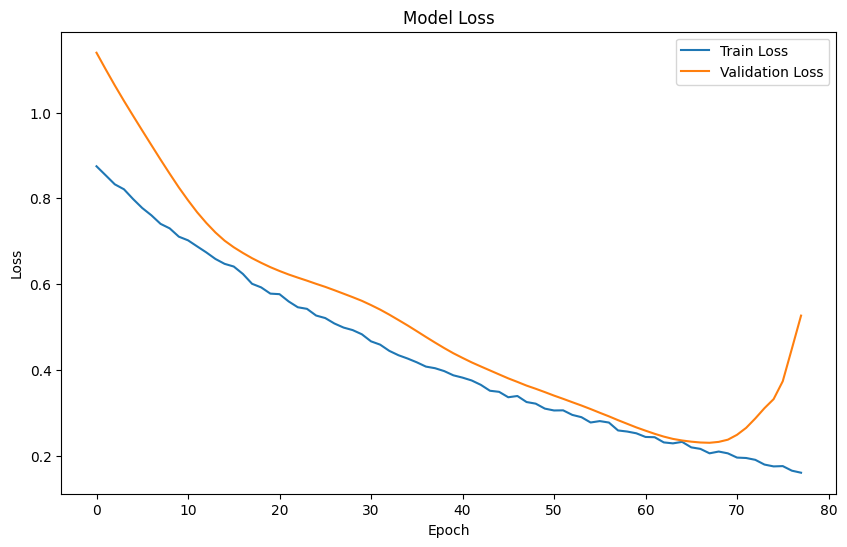

In [105]:
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/tmp/ipykernel_33/533431489.py:20: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=time_series.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='A')


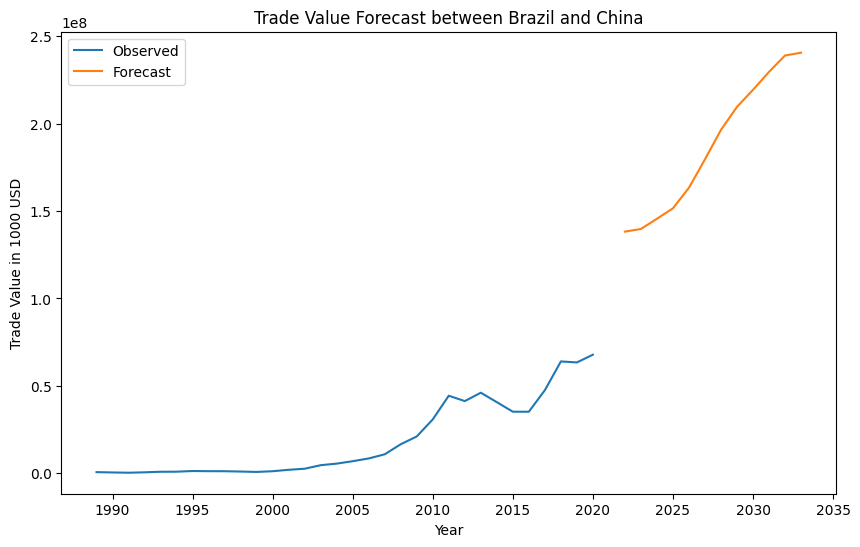

In [87]:
# Forecasting function
def forecast(model, data, seq_length, forecast_steps):
    forecast = []
    input_seq = data[-seq_length:]  # Start with the last sequence
    for _ in range(forecast_steps):
        input_seq = input_seq.reshape((1, seq_length, 1))
        pred = model.predict(input_seq)[0]
        forecast.append(pred)
        input_seq = np.append(input_seq[:, 1:, :], [[pred]], axis=1)  # Update the input sequence
    return np.array(forecast)

# Forecast future values
forecast_steps = 12  # Forecast for the next 12 periods (e.g., years)
forecast = forecast(model, scaled_data, seq_length, forecast_steps)

# Inverse transform the forecast values to original scale
forecast = scaler.inverse_transform(forecast)

# Create a time index for the forecast
forecast_index = pd.date_range(start=time_series.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='A')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Observed')
plt.plot(forecast_index, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Trade Value in 1000 USD')
plt.title('Trade Value Forecast between Brazil and China')
plt.legend()
plt.show()


In [106]:
time_series_rf_cn = pivot_data[('Russian Federation', 'China')].dropna()


time_series_rf_cn.index = pd.to_datetime(time_series_rf_cn.index, format='%Y')


time_series_rf_cn = time_series_rf_cn.sort_index()


scaled_data_rf_cn = scaler.fit_transform(time_series_rf_cn.values.reshape(-1, 1))


def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


seq_length = 10  # Number of timesteps to look back
X_rf_cn, y_rf_cn = create_sequences(scaled_data_rf_cn, seq_length)


train_size_rf_cn = int(len(X_rf_cn) * 0.8)
X_train_rf_cn, X_test_rf_cn = X_rf_cn[:train_size_rf_cn], X_rf_cn[train_size_rf_cn:]
y_train_rf_cn, y_test_rf_cn = y_rf_cn[:train_size_rf_cn], y_rf_cn[train_size_rf_cn:]

In [107]:
# Build the LSTM model with increased dropout and regularization
model_rf_cn = Sequential()
model_rf_cn.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_rf_cn.add(Dropout(0.5))
model_rf_cn.add(LSTM(units=50, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_rf_cn.add(Dropout(0.5))
model_rf_cn.add(Dense(units=1))

model_rf_cn.compile(optimizer='adam', loss='mean_squared_error')


model_rf_cn.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.0283 - val_loss: 1.1280
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 1.0004 - val_loss: 1.0873
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9726 - val_loss: 1.0484
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.9455 - val_loss: 1.0106
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9177 - val_loss: 0.9737
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.8959 - val_loss: 0.9371
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.8653 - val_loss: 0.9008
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8374 - val_loss: 0.8646
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8217 - val_loss: 0.8288
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7848 - val_loss: 0.7933
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7606 - val_loss: 0.7585
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7486 - val_

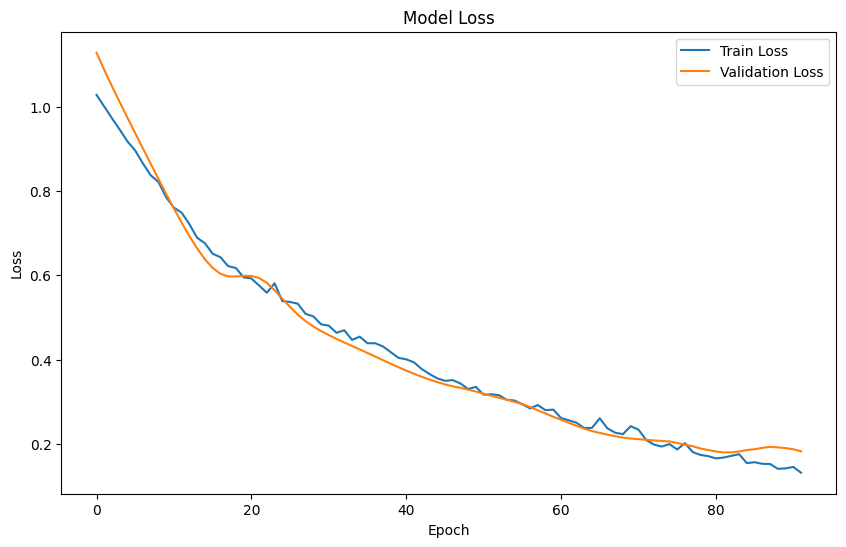

In [108]:
early_stopping_rf_cn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history_rf_cn = model_rf_cn.fit(X_train_rf_cn, y_train_rf_cn, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping_rf_cn])

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history_rf_cn.history['loss'], label='Train Loss')
plt.plot(history_rf_cn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/tmp/ipykernel_33/1540206753.py:20: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index_rf_cn = pd.date_range(start=time_series_rf_cn.index[-1] + pd.DateOffset(years=1), periods=forecast_steps_rf_cn, freq='A')


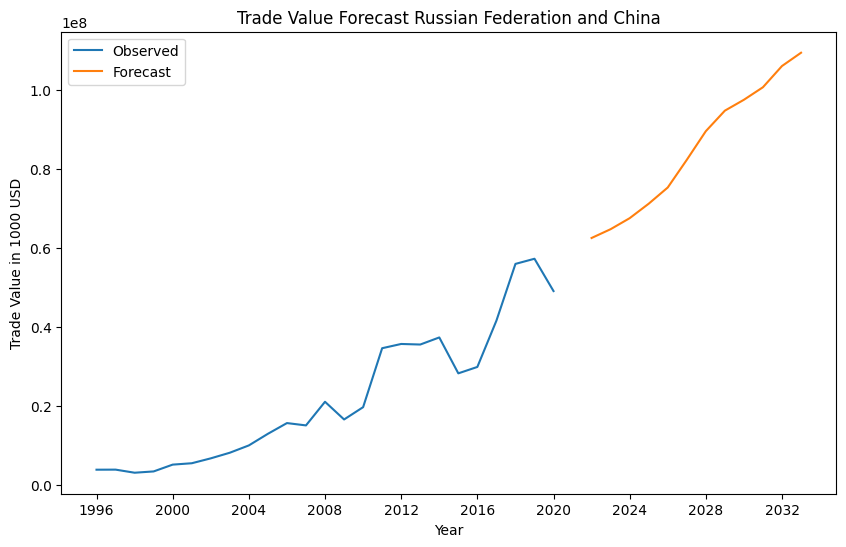

In [109]:
# Forecasting function
def forecast(model, data, seq_length, forecast_steps):
    forecast = []
    input_seq = data[-seq_length:]  # Start with the last sequence
    for _ in range(forecast_steps):
        input_seq = input_seq.reshape((1, seq_length, 1))
        pred = model.predict(input_seq)[0]
        forecast.append(pred)
        input_seq = np.append(input_seq[:, 1:, :], [[pred]], axis=1)  # Update the input sequence
    return np.array(forecast)

# Forecast future values
forecast_steps_rf_cn = 12  # Forecast for the next 12 periods (e.g., years)
forecast_rf_cn = forecast(model_rf_cn, scaled_data_rf_cn, seq_length, forecast_steps_rf_cn)

# Inverse transform the forecast values to original scale
forecast_rf_cn = scaler.inverse_transform(forecast_rf_cn)

# Create a time index for the forecast
forecast_index_rf_cn = pd.date_range(start=time_series_rf_cn.index[-1] + pd.DateOffset(years=1), periods=forecast_steps_rf_cn, freq='A')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_rf_cn.index, time_series_rf_cn.values, label='Observed')
plt.plot(forecast_index_rf_cn, forecast_rf_cn, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Trade Value in 1000 USD')
plt.title('Trade Value Forecast Russian Federation and China')
plt.legend()
plt.show()


In [110]:
time_series_rf_in = pivot_data[('Russian Federation', 'India')].dropna()


time_series_rf_in.index = pd.to_datetime(time_series_rf_in.index, format='%Y')


time_series_rf_in = time_series_rf_in.sort_index()


scaled_data_rf_in = scaler.fit_transform(time_series_rf_in.values.reshape(-1, 1))


def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


seq_length = 10  # Number of timesteps to look back
X_rf_in, y_rf_in = create_sequences(scaled_data_rf_in, seq_length)


train_size_rf_in = int(len(X_rf_in) * 0.8)
X_train_rf_in, X_test_rf_in = X_rf_in[:train_size_rf_in], X_rf_in[train_size_rf_in:]
y_train_rf_in, y_test_rf_in = y_rf_in[:train_size_rf_in], y_rf_in[train_size_rf_in:]


In [111]:

model_rf_in = Sequential()
model_rf_in.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_rf_in.add(Dropout(0.5))
model_rf_in.add(LSTM(units=50, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_rf_in.add(Dropout(0.5))
model_rf_in.add(Dense(units=1))

model_rf_in.compile(optimizer='adam', loss='mean_squared_error')


model_rf_in.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.2411 - val_loss: 1.2160
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.2098 - val_loss: 1.1401
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1.1263 - val_loss: 1.0687
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1.1078 - val_loss: 1.0017
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 1.0236 - val_loss: 0.9385
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9939 - val_loss: 0.8799
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9326 - val_loss: 0.8262
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8743 - val_loss: 0.7786
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.8399 - val_loss: 0.7390
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8307 - val_loss: 0.7100
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7802 - val_loss: 0.6943
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7446 - val_los

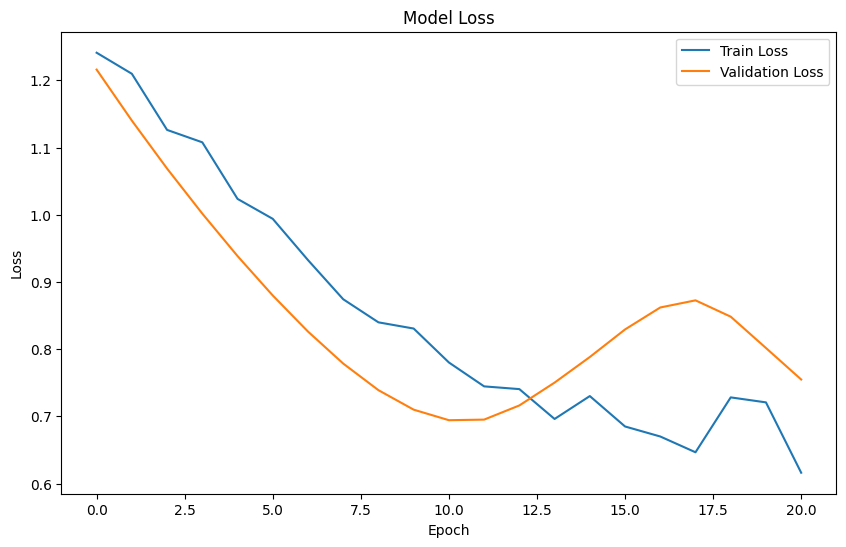

In [112]:
early_stopping_rf_in = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history_rf_in = model_rf_in.fit(X_train_rf_in, y_train_rf_in, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping_rf_in])


plt.figure(figsize=(10, 6))
plt.plot(history_rf_in.history['loss'], label='Train Loss')
plt.plot(history_rf_in.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/tmp/ipykernel_33/3048423980.py:19: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index_rf_in = pd.date_range(start=time_series_rf_in.index[-1] + pd.DateOffset(years=1), periods=forecast_steps_rf_in, freq='A')


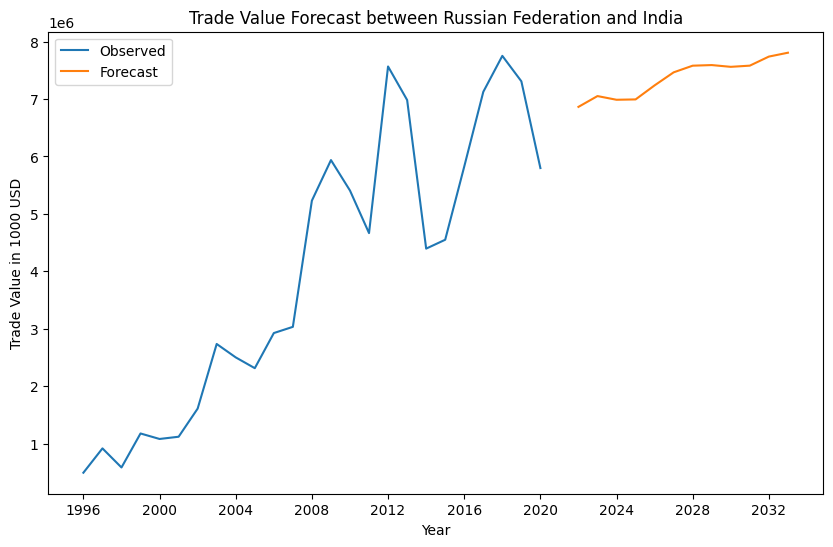

In [113]:

def forecast(model, data, seq_length, forecast_steps):
    forecast = []
    input_seq = data[-seq_length:]  # Start with the last sequence
    for _ in range(forecast_steps):
        input_seq = input_seq.reshape((1, seq_length, 1))
        pred = model.predict(input_seq)[0]
        forecast.append(pred)
        input_seq = np.append(input_seq[:, 1:, :], [[pred]], axis=1)  # Update the input sequence
    return np.array(forecast)


forecast_steps_rf_in = 12  # Forecast for the next 12 periods (e.g., years)
forecast_rf_in = forecast(model_rf_in, scaled_data_rf_in, seq_length, forecast_steps_rf_in)


forecast_rf_in = scaler.inverse_transform(forecast_rf_in)


forecast_index_rf_in = pd.date_range(start=time_series_rf_in.index[-1] + pd.DateOffset(years=1), periods=forecast_steps_rf_in, freq='A')


plt.figure(figsize=(10, 6))
plt.plot(time_series_rf_in.index, time_series_rf_in.values, label='Observed')
plt.plot(forecast_index_rf_in, forecast_rf_in, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Trade Value in 1000 USD')
plt.title('Trade Value Forecast between Russian Federation and India')
plt.legend()
plt.show()


In [9]:
!pip install torch torchvision torchaudio


In [ ]:

!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cpu.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.11.0+cpu.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-1.11.0+cpu.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-1.11.0+cpu.html
^C
ERROR: Operation cancelled by user
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cpu.html


In [26]:
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
filtered_data = dataset[(dataset['ReporterName'].isin(brics_countries)) & (dataset['PartnerName'].isin(brics_countries))]


agg_data = filtered_data.groupby(['Year', 'ReporterName', 'PartnerName'])['TradeValue in 1000 USD'].sum().reset_index()


print(agg_data.head())

   Year ReporterName   PartnerName  TradeValue in 1000 USD
0  1988        India        Brazil               37031.336
1  1988        India         China               45483.804
2  1988        India  South Africa                2590.907
3  1989       Brazil         China              563351.424
4  1989       Brazil         India              188127.648


In [25]:
import networkx as nx
from torch_geometric.utils import from_networkx
import torch


G = nx.DiGraph()


for country in brics_countries:
    G.add_node(country)


for _, row in agg_data.iterrows():
    if row['ReporterName'] in brics_countries and row['PartnerName'] in brics_countries:
        G.add_edge(row['ReporterName'], row['PartnerName'], weight=row['TradeValue in 1000 USD'])

data = from_networkx(G)


years = agg_data['Year'].unique()
year_dict = {year: idx for idx, year in enumerate(years)}
data.x = torch.tensor([year_dict[year] for year in agg_data['Year']], dtype=torch.float).view(-1, 1)
data.edge_attr = torch.tensor(agg_data['TradeValue in 1000 USD'].values, dtype=torch.float).view(-1, 1)
data.y = data.edge_attr.clone()  # Using the same values for labels for simplicity

print(data)


Data(edge_index=[2, 20], weight=[20], num_nodes=5, x=[589, 1], edge_attr=[589, 1], y=[589, 1])


In [28]:
import pandas as pd
import networkx as nx
from torch_geometric.utils import from_networkx
import torch
from sklearn.preprocessing import MinMaxScaler


# Filter the dataset for BRICS countries
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
filtered_data = dataset[(dataset['ReporterName'].isin(brics_countries)) & (dataset['PartnerName'].isin(brics_countries))]

# Aggregate data by year and country pairs
agg_data = filtered_data.groupby(['Year', 'ReporterName', 'PartnerName'])['TradeValue in 1000 USD'].sum().reset_index()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and initialize year list for each node
for country in brics_countries:
    G.add_node(country, year=[])

# Add edges and update node features (year) and edge attributes (trade value)
for _, row in agg_data.iterrows():
    reporter = row['ReporterName']
    partner = row['PartnerName']
    year = row['Year']
    trade_value = row['TradeValue in 1000 USD']
    
    G.nodes[reporter]['year'].append(year)
    G.nodes[partner]['year'].append(year)
    
    if G.has_edge(reporter, partner):
        G[reporter][partner]['weight'] += trade_value
    else:
        G.add_edge(reporter, partner, weight=trade_value)

# Compute average year for each node
for node in G.nodes():
    years = G.nodes[node]['year']
    if years:
        avg_year = sum(years) / len(years)
    else:
        avg_year = 0
    G.nodes[node]['year'] = avg_year

# Convert to PyTorch Geometric data
data = from_networkx(G)

# Normalize the node features (year) and edge attributes (trade value)
scaler = MinMaxScaler()
node_features = [G.nodes[n]['year'] for n in G.nodes()]
node_features = torch.tensor(scaler.fit_transform([[year] for year in node_features]), dtype=torch.float)
data.x = node_features

edge_weights = [G.edges[edge]['weight'] for edge in G.edges()]
edge_weights = torch.tensor(scaler.fit_transform([[weight] for weight in edge_weights]), dtype=torch.float)
data.edge_attr = edge_weights
data.y = edge_weights.clone()  # Using the same values for labels for simplicity

print(data)


Data(edge_index=[2, 20], year=[5], weight=[20], num_nodes=5, x=[5, 1], edge_attr=[20, 1], y=[20, 1])


In [29]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch.optim.lr_scheduler import StepLR

class EnhancedGNN(torch.nn.Module):
    def __init__(self):
        super(EnhancedGNN, self).__init__()
        self.conv1 = GCNConv(1, 64)  # Increased the number of filters
        self.conv2 = GCNConv(64, 64)
        self.conv3 = GCNConv(64, 32)  # Added an additional convolutional layer
        self.lin = torch.nn.Linear(32, 1)
        self.dropout = torch.nn.Dropout(0.4)  # Increased Dropout for regularization

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)  # Global pooling
        x = self.lin(x)
        return x

model = EnhancedGNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # Adjusted the learning rate
scheduler = StepLR(optimizer, step_size=20, gamma=0.7)  # Added learning rate scheduler
criterion = torch.nn.MSELoss()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    scheduler.step()  # Adjust the learning rate
    return loss.item()

# Training the model
epochs = 200  # Increased the number of epochs for more training
for epoch in range(epochs):
    loss = train()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Loss {loss}')


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: Loss 0.11975330114364624
Epoch 10: Loss 0.09752157330513
Epoch 20: Loss 0.0983847826719284
Epoch 30: Loss 0.09820588678121567
Epoch 40: Loss 0.09764223545789719
Epoch 50: Loss 0.09824515879154205
Epoch 60: Loss 0.09821553528308868
Epoch 70: Loss 0.09765005856752396
Epoch 80: Loss 0.09793857485055923
Epoch 90: Loss 0.09745537489652634
Epoch 100: Loss 0.09745379537343979
Epoch 110: Loss 0.09750600159168243
Epoch 120: Loss 0.09745179116725922
Epoch 130: Loss 0.09787119179964066
Epoch 140: Loss 0.09749871492385864
Epoch 150: Loss 0.09753219038248062
Epoch 160: Loss 0.0975046157836914
Epoch 170: Loss 0.09746865928173065
Epoch 180: Loss 0.09754601866006851
Epoch 190: Loss 0.09747378528118134


In [30]:
def evaluate(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        mse = criterion(out, data.y).item()
        return mse

# Evaluate the model
mse = evaluate(model, data)
print(f'Test MSE: {mse:.4f}')


Test MSE: 0.0974
